In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# RTT_max

# Idle Latency

In [50]:
latency = pd.read_csv("data_rtt_max_week/Average of Idle latency.csv")
speed = pd.read_csv("data_rtt_max_week/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,284.496,34.005
654,1.688947e+09,287.265,34.012
655,1.689552e+09,291.132,33.686
656,1.690157e+09,289.712,33.954
657,1.690762e+09,289.100,33.680


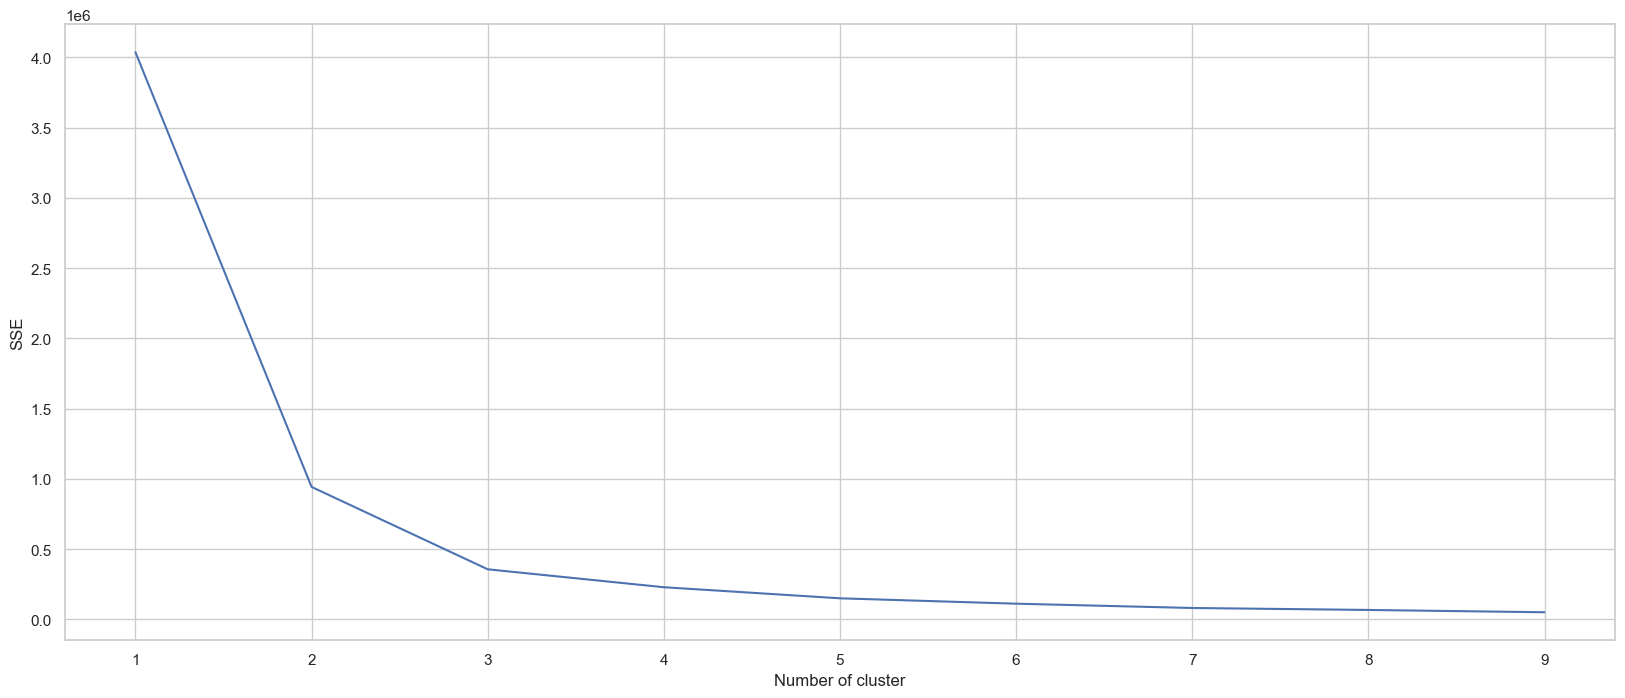

In [51]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')

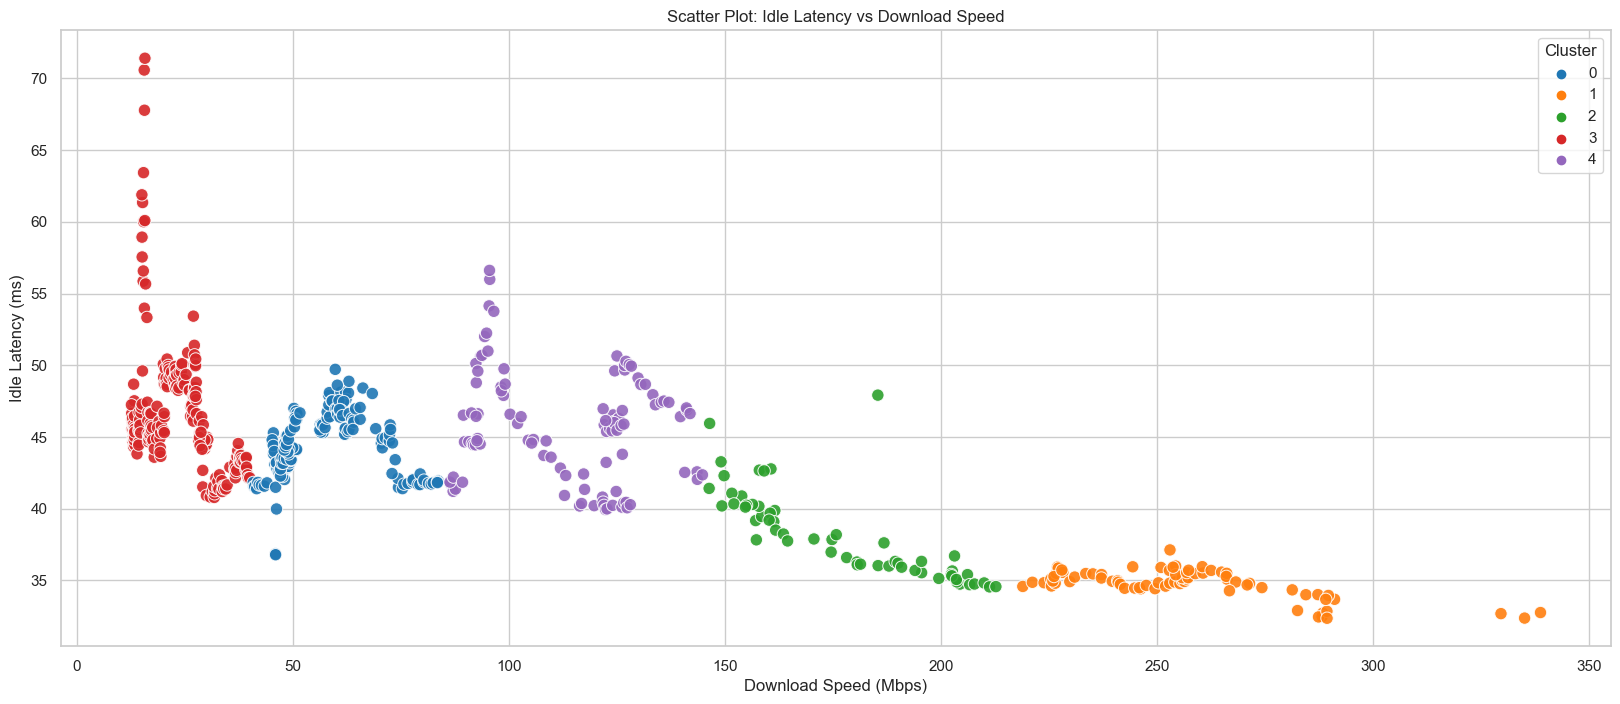

In [53]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Idle Latency (ms)')
plt.xlabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Idle Latency vs Download Speed')
plt.show()

In [54]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 12.6-40.0     | 40.8-71.4       |               23.3 |               46.8 |                37.9 |                55.8 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         0 | 40.8-83.6     | 36.8-49.7       |               57.4 |               44.4 |                79.4 |                48.0 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         4 | 86.3-144.8    | 39.9-56.6       |              1

# Downstream LUL

In [45]:
latency = pd.read_csv("data_rtt_max_week/Average of downstream LUL.csv")
speed = pd.read_csv("data_rtt_max_week/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,284.496,128.557
654,1.688947e+09,287.265,129.977
655,1.689552e+09,291.132,129.722
656,1.690157e+09,289.712,130.518
657,1.690762e+09,289.100,131.230


In [ ]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')
data_copy.tail()

,dtime per week,Average speed (Mbps),Average latency (ms),Cluster
653,2023-07-03,284.496,128.557,1
654,2023-07-10,287.265,129.977,1
655,2023-07-17,291.132,129.722,1
656,2023-07-24,289.712,130.518,1
657,2023-07-31,289.100,131.230,1


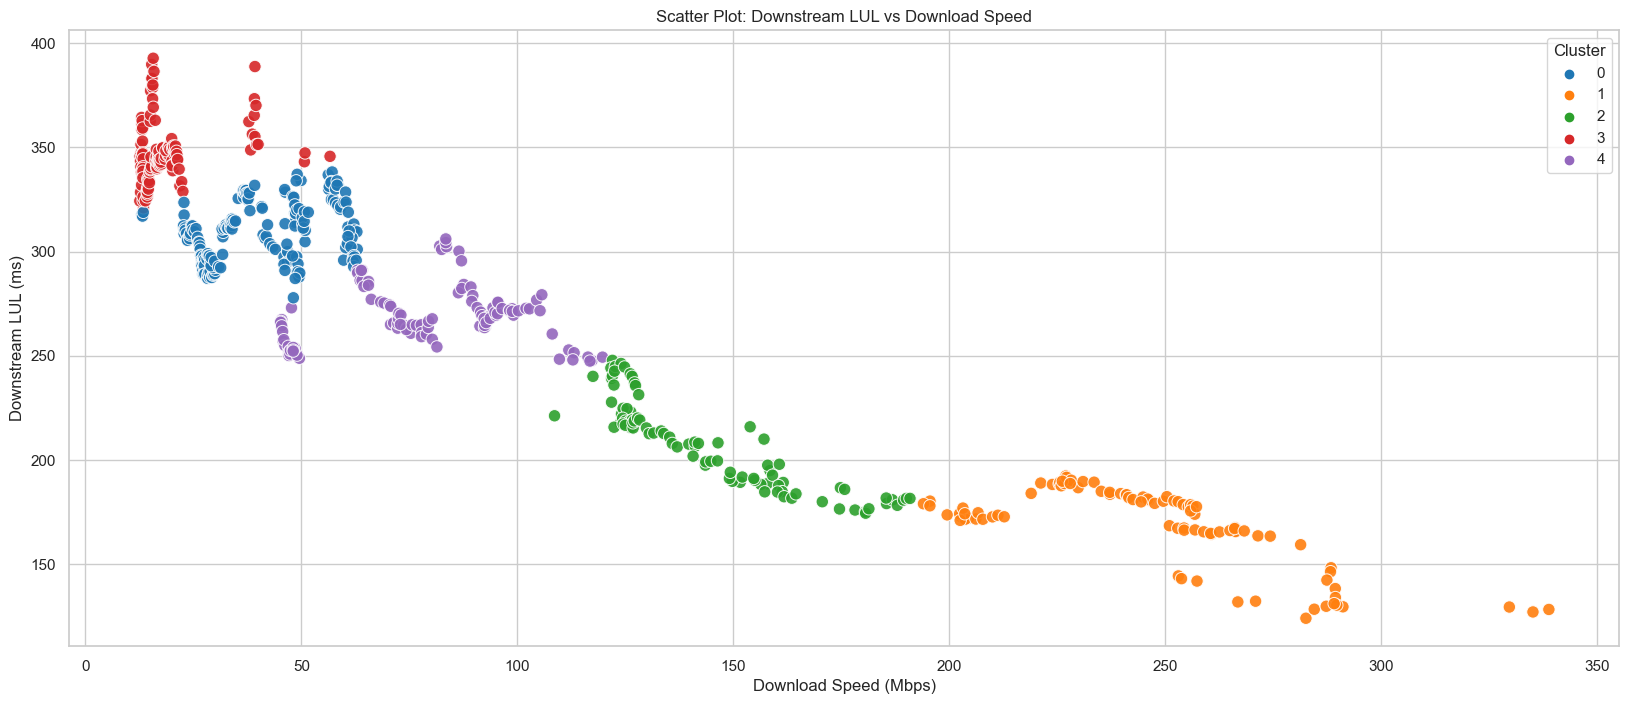

In [48]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Downstream LUL (ms)')
plt.xlabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Downstream LUL vs Download Speed')
plt.show()

In [49]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 12.6-56.6     | 320.9-392.6     |               19.1 |              347.6 |                39.2 |               379.5 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         0 | 13.1-62.9     | 277.8-338.1     |               40.2 |              308.4 |                61.7 |               331.7 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         4 | 45.2-119.7    | 247.5-306.0     |               

# Upstream LUL

In [40]:
latency = pd.read_csv("data_rtt_max_week/Average of upstream LUL.csv")
speed = pd.read_csv("data_rtt_max_week/Average upload speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,141.963,226.878
654,1.688947e+09,141.638,227.011
655,1.689552e+09,143.087,220.248
656,1.690157e+09,142.339,220.734
657,1.690762e+09,140.593,222.528


In [ ]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')

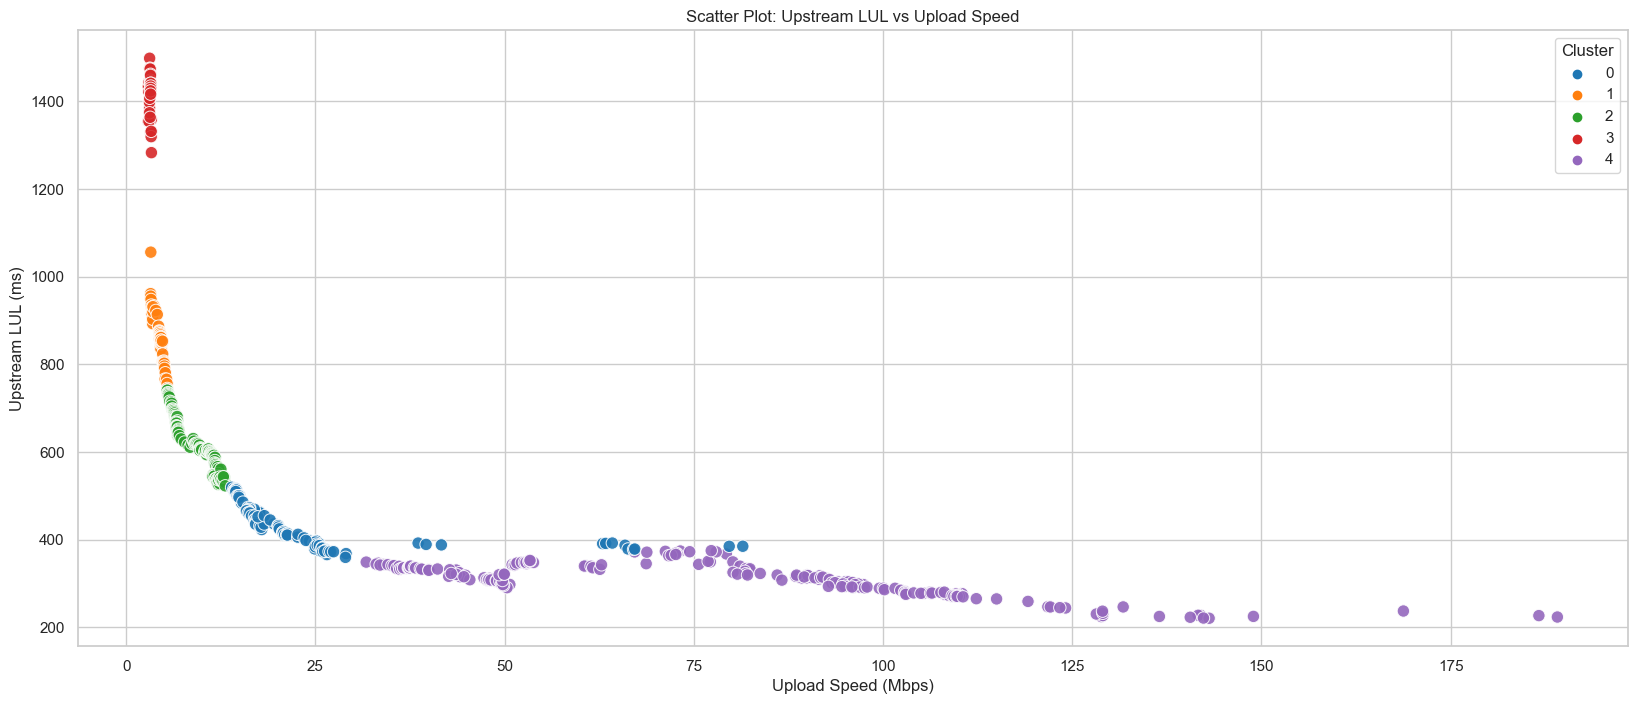

In [43]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Upstream LUL (ms)')
plt.xlabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Upstream LUL vs Upload Speed')
plt.show()

In [44]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 2.9-3.3       | 1283.0-1498.5   |                3.2 |             1407.8 |                 3.3 |              1475.4 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         1 | 3.2-5.4       | 744.8-1055.9    |                4.3 |              871.3 |                 5.2 |               955.5 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         2 | 5.4-13.1      | 522.5-741.6     |               

# RTT_min

# Idle Latency

In [13]:
latency = pd.read_csv("data_rtt_min_week/Average of Idle latency.csv")
speed = pd.read_csv("data_rtt_min_week/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,284.731,17.415
654,1.688947e+09,287.523,17.245
655,1.689552e+09,291.179,17.246
656,1.690157e+09,289.557,17.298
657,1.690762e+09,292.585,17.023


In [ ]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')

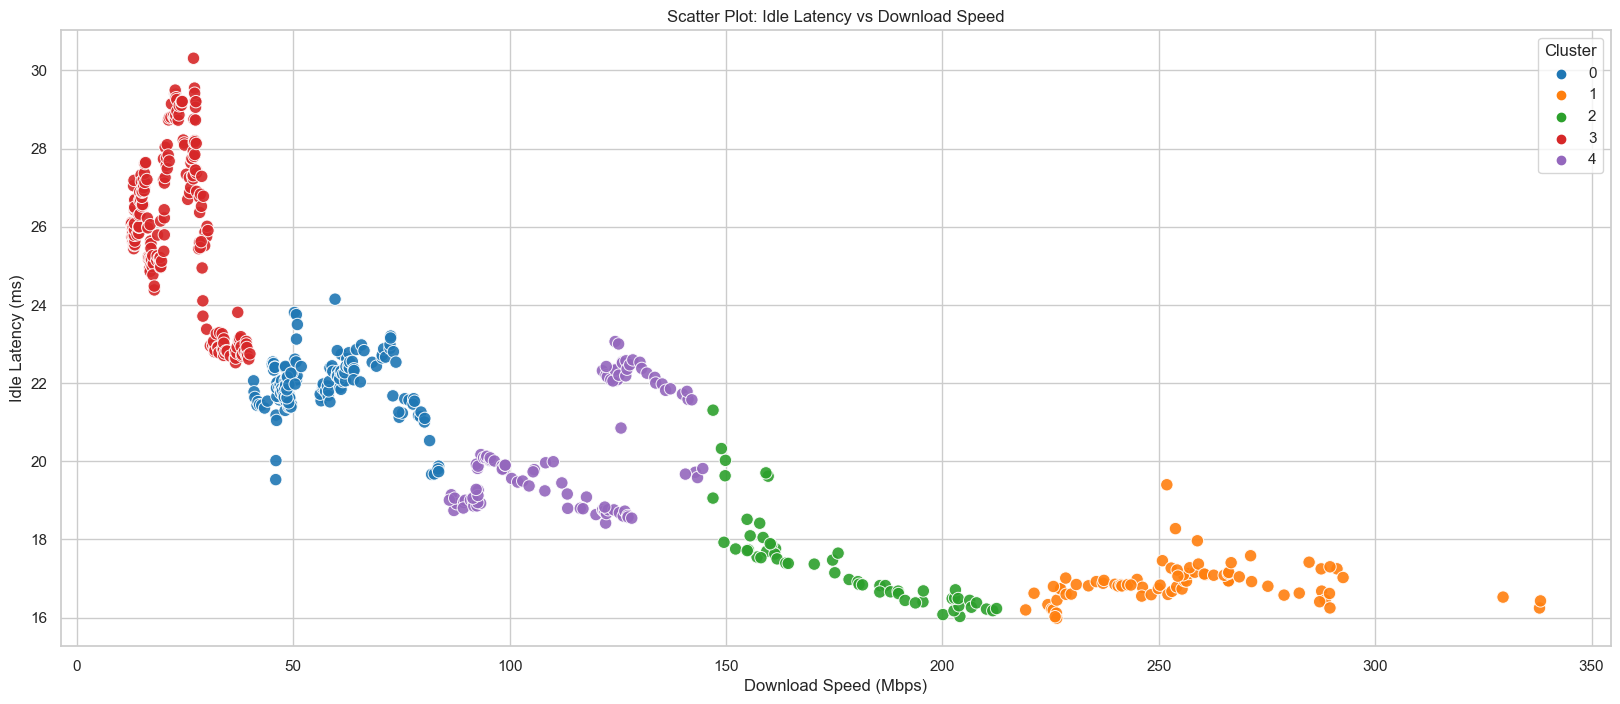

In [19]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Idle Latency (ms)')
plt.xlabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Idle Latency vs Download Speed')
plt.show()

In [20]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 12.6-40.0     | 22.5-30.3       |               23.3 |               26.0 |                37.9 |                29.2 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         0 | 40.8-83.6     | 19.5-24.1       |               57.4 |               21.9 |                79.5 |                23.0 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         4 | 86.1-144.6    | 18.4-23.1       |              1

# Downstream LUL

In [35]:
latency = pd.read_csv("data_rtt_min_week/Average of downstream LUL.csv")
speed = pd.read_csv("data_rtt_min_week/Average download speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,284.731,17.674
654,1.688947e+09,287.523,17.623
655,1.689552e+09,291.179,17.573
656,1.690157e+09,289.557,17.697
657,1.690762e+09,292.585,17.485


In [ ]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')
data_copy.tail()

,dtime per week,Average speed (Mbps),Average latency (ms),Cluster
653,2023-07-03,284.731,17.674,1
654,2023-07-10,287.523,17.623,1
655,2023-07-17,291.179,17.573,1
656,2023-07-24,289.557,17.697,1
657,2023-07-31,292.585,17.485,1


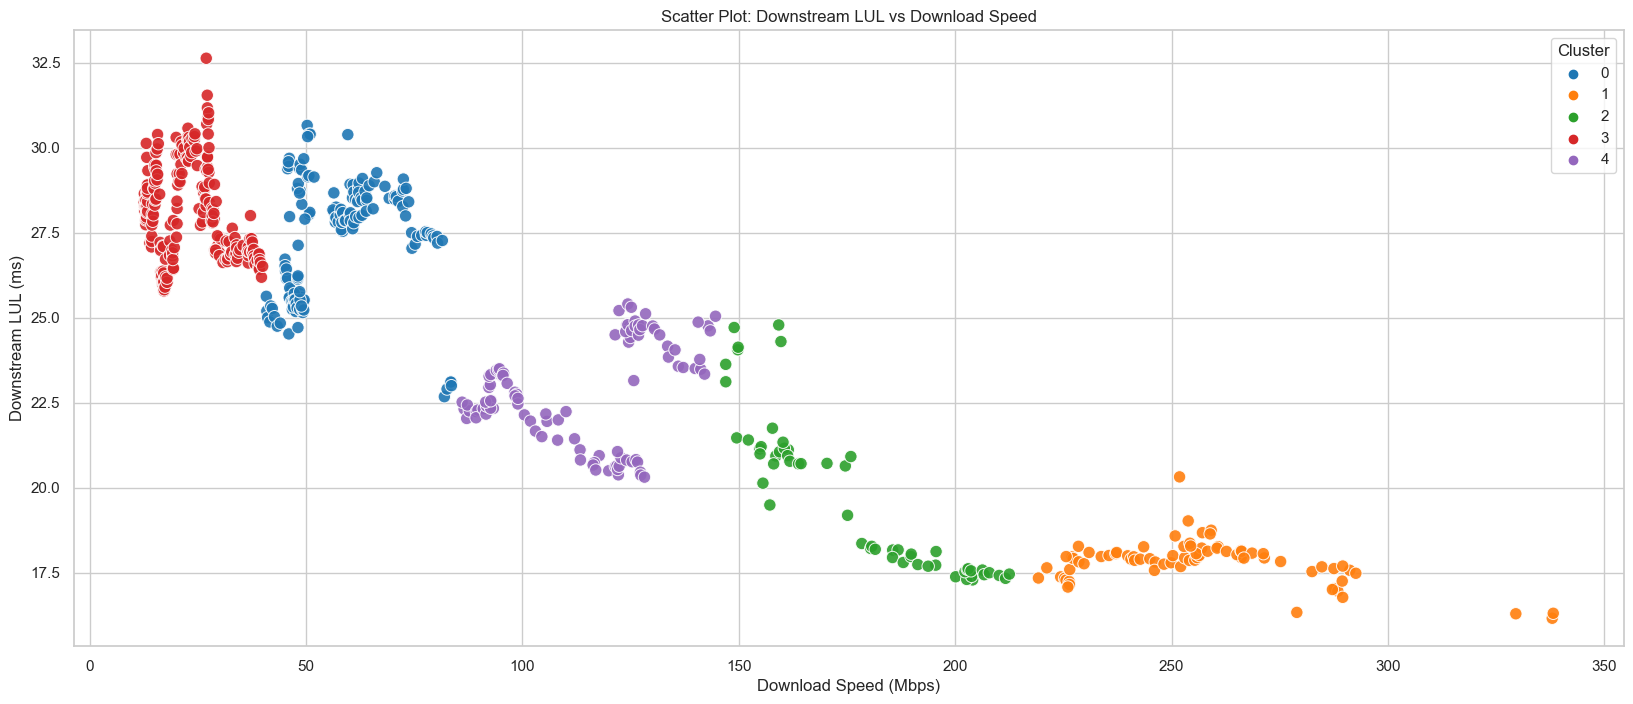

In [38]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Downstream LUL (ms)')
plt.xlabel('Download Speed (Mbps)')
plt.title('Scatter Plot: Downstream LUL vs Download Speed')
plt.show()

In [39]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 12.6-40.0     | 25.8-32.6       |               23.3 |               28.2 |                37.9 |                30.3 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         0 | 40.8-83.6     | 22.7-30.7       |               57.3 |               27.3 |                79.5 |                29.6 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         4 | 86.1-144.6    | 20.3-25.4       |              1

# Upstream LUL

In [30]:
latency = pd.read_csv("data_rtt_min_week/Average of upstream LUL.csv")
speed = pd.read_csv("data_rtt_min_week/Average upload speed.csv")
merge_df = pd.merge(speed, latency, how="left", on="dtime per week")
# merge_df['Average latency (ms)'] = merge_df['Average latency (ms)'].str.replace(",","").astype(float)
merge_df['dtime per week'] = pd.to_datetime(merge_df['dtime per week'], format='%Y-%m-%d')
merge_df['dtime per week'] = merge_df['dtime per week'].apply(lambda x: x.timestamp())
merge_df.dropna(inplace=True)
merge_df.tail()

,dtime per week,Average speed (Mbps),Average latency (ms)
653,1.688342e+09,141.972,17.301
654,1.688947e+09,141.778,17.253
655,1.689552e+09,143.127,17.229
656,1.690157e+09,142.087,17.257
657,1.690762e+09,141.140,17.192


In [ ]:
X = merge_df[['Average speed (Mbps)', 'Average latency (ms)']].to_numpy()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0, n_init="auto").fit(X)
    # data["Cluster"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=0, n_init="auto").fit(X)
data_copy = merge_df.copy(deep=True)
data_copy['Cluster'] = kmeans.labels_
data_copy['dtime per week'] = pd.to_datetime(data_copy['dtime per week'], unit='s')

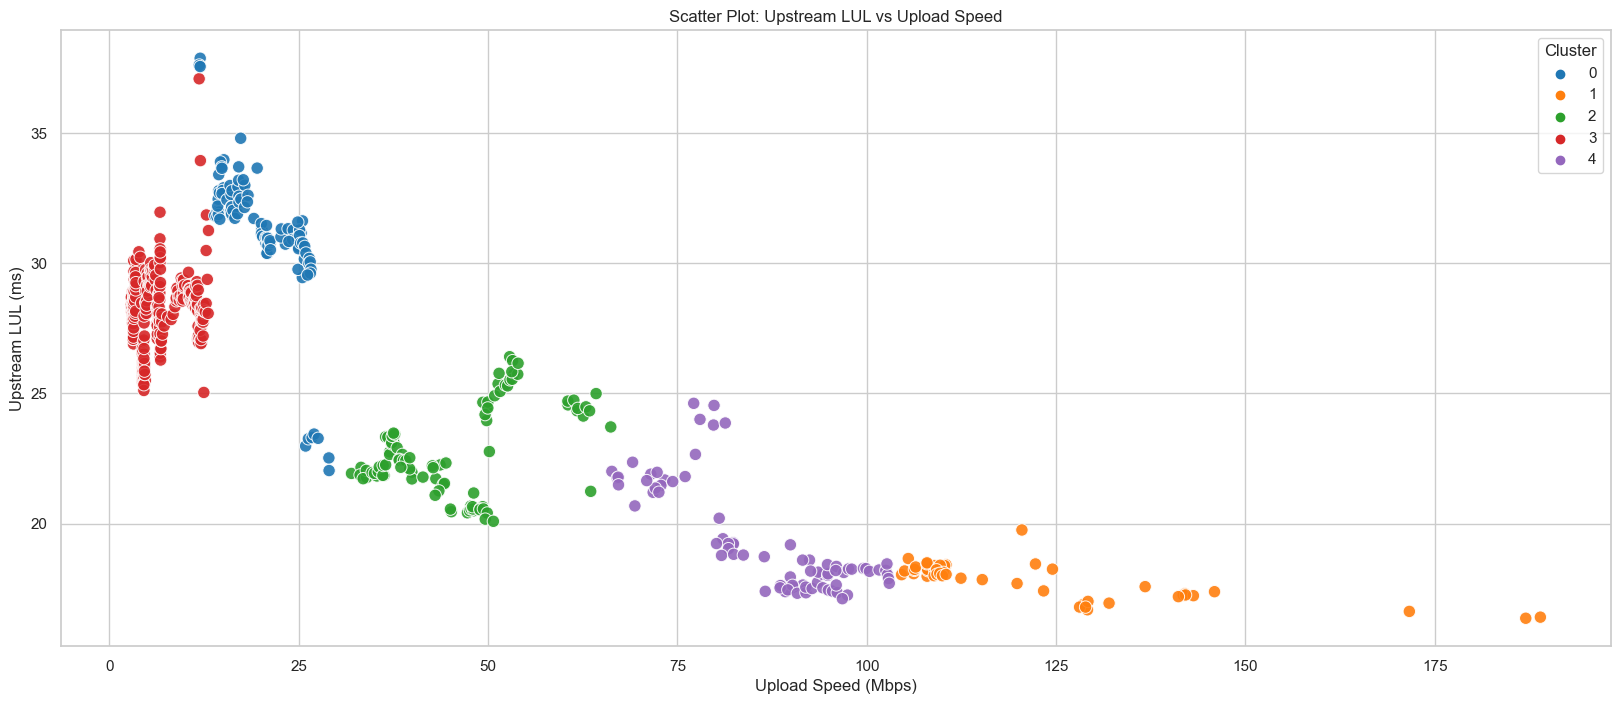

In [33]:
sns.scatterplot(y='Average latency (ms)', x='Average speed (Mbps)', hue='Cluster',data=data_copy, palette='tab10', s=80, alpha=0.9)
sns.set_theme(rc={'figure.figsize':(20,8)}, style='whitegrid')
plt.ylabel('Upstream LUL (ms)')
plt.xlabel('Upload Speed (Mbps)')
plt.title('Scatter Plot: Upstream LUL vs Upload Speed')
plt.show()

In [34]:
aggregated_data = data_copy.groupby('Cluster').agg(
    Speed_min=('Average speed (Mbps)', 'min'),
    Speed_max=('Average speed (Mbps)', 'max'),
    Speed_avg=('Average speed (Mbps)', 'mean'),
    Latency_min=('Average latency (ms)', 'min'),
    Latency_max=('Average latency (ms)', 'max'),
    Latency_avg=('Average latency (ms)', 'mean')
)
aggregated_data = aggregated_data.round(1)

aggregated_data['Speed Range'] = aggregated_data['Speed_min'].astype(str) + '-' + aggregated_data['Speed_max'].astype(str)
aggregated_data['Latency Range'] = aggregated_data['Latency_min'].astype(str) + '-' + aggregated_data['Latency_max'].astype(str)

speed_avg = aggregated_data.pop('Speed_avg')
latency_avg = aggregated_data.pop('Latency_avg')
aggregated_data.insert(len(aggregated_data.columns), 'Avg Speed (Mbps)', speed_avg)
aggregated_data.insert(len(aggregated_data.columns), 'Avg Latency (ms)', latency_avg)

aggregated_data['95pc Speed (Mbps)'] = data_copy.groupby('Cluster')['Average speed (Mbps)'].quantile(0.95)
aggregated_data['95pc Latency (ms)'] = data_copy.groupby('Cluster')['Average latency (ms)'].quantile(0.95)

aggregated_data.drop(['Speed_min', 'Speed_max', 'Latency_min', 'Latency_max'], axis=1, inplace=True)

aggregated_data = aggregated_data.sort_values('Avg Speed (Mbps)')

print(aggregated_data.to_markdown(tablefmt="grid", floatfmt='.1f'))

+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|   Cluster | Speed Range   | Latency Range   |   Avg Speed (Mbps) |   Avg Latency (ms) |   95pc Speed (Mbps) |   95pc Latency (ms) |
+===========+===============+=================+====================+====================+=====================+=====================+
|         3 | 2.9-13.1      | 25.0-37.1       |                7.1 |               28.3 |                12.4 |                30.1 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         0 | 11.9-29.0     | 22.0-37.9       |               20.0 |               31.3 |                26.6 |                33.8 |
+-----------+---------------+-----------------+--------------------+--------------------+---------------------+---------------------+
|         2 | 32.0-66.2     | 20.1-26.4       |               